In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Coefficients for ax³ + bx² + cx + d = 0
a = 2.0
b = -3.0
c = -11.0
d = 6.0

In [3]:
class CubicSolver(nn.Module):
    def __init__(self, start_value=1.0):
        super().__init__()
        self.x = nn.Parameter(torch.tensor([start_value], dtype=torch.float32))
        self.relu = nn.ReLU()
    def forward(self):
        x_val = self.relu(self.x)
        return a * x_val**3 + b * x_val**2 + c * x_val + d

In [4]:
model = CubicSolver(start_value=1.0)
optimizer = optim.SGD(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()
loss_history = []

In [5]:
epochs = 5000
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model()
    loss = loss_fn(output, torch.tensor([0.0]))
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())
    if epoch % 500 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.item()}, x: {model.relu(model.x).item()}, grad: {model.x.grad.item()}")

Epoch: 0, Loss: 36.0, x: 0.8679999709129333, grad: 132.0
Epoch: 500, Loss: 2.2737367544323206e-13, x: 0.5000000596046448, grad: 1.1920928955078125e-05
Epoch: 1000, Loss: 2.2737367544323206e-13, x: 0.5000000596046448, grad: 1.1920928955078125e-05
Epoch: 1500, Loss: 2.2737367544323206e-13, x: 0.5000000596046448, grad: 1.1920928955078125e-05
Epoch: 2000, Loss: 2.2737367544323206e-13, x: 0.5000000596046448, grad: 1.1920928955078125e-05
Epoch: 2500, Loss: 2.2737367544323206e-13, x: 0.5000000596046448, grad: 1.1920928955078125e-05
Epoch: 3000, Loss: 2.2737367544323206e-13, x: 0.5000000596046448, grad: 1.1920928955078125e-05
Epoch: 3500, Loss: 2.2737367544323206e-13, x: 0.5000000596046448, grad: 1.1920928955078125e-05
Epoch: 4000, Loss: 2.2737367544323206e-13, x: 0.5000000596046448, grad: 1.1920928955078125e-05
Epoch: 4500, Loss: 2.2737367544323206e-13, x: 0.5000000596046448, grad: 1.1920928955078125e-05


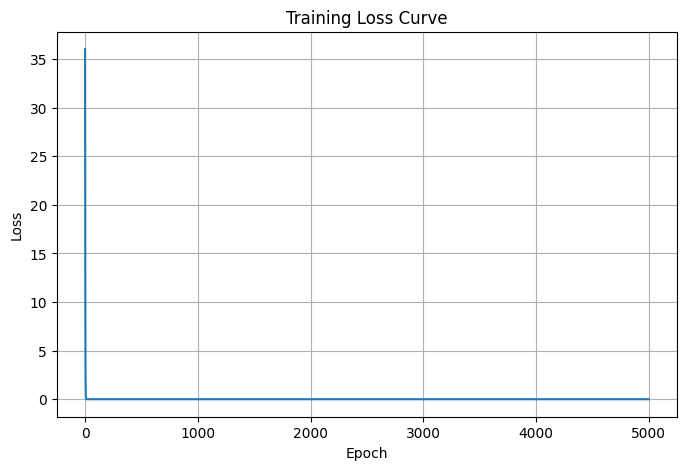

In [6]:
plt.figure(figsize=(8,5))
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()

In [7]:
x_solution = model.relu(model.x).item()
print("Approximate solution for x:", x_solution)
print("Final loss:", loss_history[-1])

Approximate solution for x: 0.5000000596046448
Final loss: 2.2737367544323206e-13


In [8]:
coeffs = [a, b, c, d]
analytical_roots = np.roots(coeffs)
real_roots = [r.real for r in analytical_roots if np.isreal(r)]
print("Analytical real roots:", real_roots)
print("Model's learned root:", x_solution)

Analytical real roots: [np.float64(2.9999999999999996), np.float64(-2.0), np.float64(0.49999999999999983)]
Model's learned root: 0.5000000596046448


In [9]:
solutions = []

for start in [0.1, 1.0, 2.0, 5.0]:
    model = CubicSolver(start_value=start)
    optimizer = optim.SGD(model.parameters(), lr=0.001)

    for epoch in range(2000):
        optimizer.zero_grad()
        output = model()
        loss = (output - 0)**2
        loss.backward()
        optimizer.step()

    solutions.append(model.relu(model.x).item())

print("Solutions from different initial values:", solutions)

Solutions from different initial values: [0.4999999403953552, 0.5000000596046448, 3.0, 0.0]


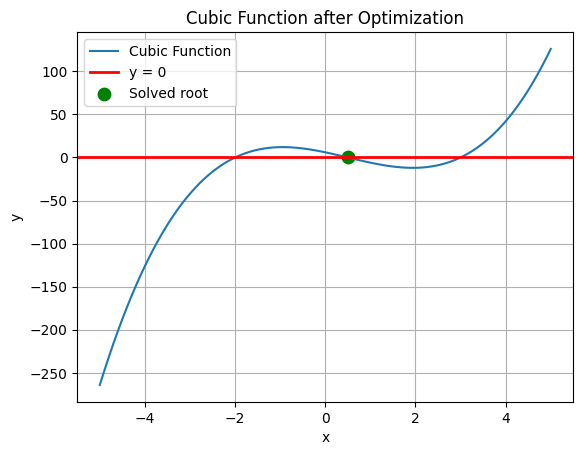

In [11]:
import matplotlib.pyplot as plt

x_vals = torch.linspace(-5, 5, 100)
y_vals = a*x_vals**3 + b*x_vals**2 + c*x_vals + d

plt.plot(x_vals.detach(), y_vals.detach(), label="Cubic Function")
plt.axhline(0, color='red', linewidth=2, label="y = 0")
plt.scatter([x_solution], [0], color='green', s=80, label="Solved root")
plt.title("Cubic Function after Optimization")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()